# Ценральная предельная теорема своими руками

В этом задании я проверю работу центральной предельной теоремы, а также поработаю с генерацией случайных чисел и построением графиков в Питоне.

Я выбрал непрерывное распределение Парето. 
Это распределение используется при описании следующих процессов:
* Распределение благосостояния в экономике
* Распределение дохода в обществе
* Зависимость абсолютной частоты слов в лингвистике
* Популярность имен
* Распределение размера населенных пунктов
* Распределение размера файла в интернет-трафике по TCP-протоколу

https://ru.wikipedia.org/wiki/Распределение_Парето

In [68]:
"""Импортируем необходмые библиотеки"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

Сгенерируем из него выборку объёма 1000

In [55]:
b = 2.62
pareto_rv = sts.pareto(b)
sample = pareto_rv.rvs(1000)

Построим гистограмму выборки и нарисуем поверх неё теоретическую плотность распределения случайной величины. 

In [76]:
# Функция строит по заданной случайной величине и выборке ее значений
# гистограмму и плотность распределения
# количество бинов в гистограмме по умолчанию 30
# x_min, x_max - границы графика
def rv_hist_and_plot(rv, sample, x_min, x_max, bins = 30):
    x = np.linspace(x_min, x_max, 100)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, 'r-', alpha = 0.6, label = 'theoretical pdf')
    plt.hist(sample, bins, density = True, label = 'hist')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.legend(loc='best', frameon=False)
    plt.show()

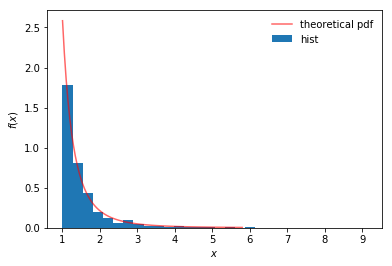

In [77]:
rv_hist_and_plot(pareto_rv, sample,pareto_rv.ppf(0.01), pareto_rv.ppf(0.99))

Оценим распределение выборочного среднего случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируем 1000 выборок объёма n и построим гистограммы распределений их выборочных средних.

Среднее: $$ E[x] = \frac{x(m) b}{b-1} $$, где x(m) - минимальное значение( по умолчанию 1), b - коэффициент кривизны

Дисперсия: $$D[x] = (E[x])^2 (\frac{b}{b-2})$$ при k > 2
    

In [66]:
def pareto_mean(b):
    return b/(b-1)

def pareto_disp(b):
    m = pareto_mean(b)
    return m**2*b/(b-2)

In [80]:
# Функция строит гистограмму распредения выборочного среднего
# и плотность нормального распределения со статистиками Парето
def hist_pareto_sample_means(n, b) :
    pareto_rv = sts.pareto(b) #случайная величина распределенная по Парето
    sample = np.array([]) # массив выборочных средних
    i = 1
    while i <=1000:
        sample_i = pareto_rv.rvs(n)
        mean_i = sum(sample_i)/n
        sample = np.append(sample, mean_i)
        i+=1
    E = pareto_mean(b)
    D = pareto_disp(b)
    #Стандартное отклонение нормального 
    #распределения приближающего выборку средних
    std = math.sqrt(D/n)
    # Нормальное распределение с характеристиками распределения Парето
    norm = sts.norm(E, std)
    rv_hist_and_plot(norm, sample, pareto_rv.ppf(0.01), pareto_rv.ppf(0.99))

#### при n = 5

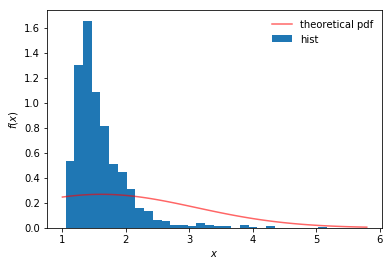

In [81]:
hist_pareto_sample_means(5, b)

#### при n = 30

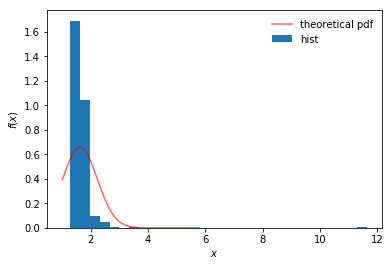

In [83]:
hist_pareto_sample_means(30, b)

#### при n = 100

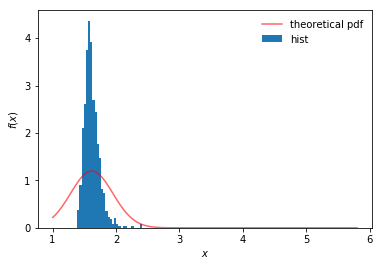

In [84]:
hist_pareto_sample_means(100, b)

### Выводы

По полученным графикам и гистограммам можно сделать вывод, что точность апроксимации  выборочного непрерывной случайной величины Парето увеличивается с увеличением величины выборки. Однако даже при большом обьеме выборки наблюдается скошенность графика в связи с особенностями плотности распределения Парето, в частности из-за ограниченности ее значений (>1)